<a href="https://colab.research.google.com/github/MoatasemEssam/strokedetection/blob/main/stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE


import warnings
warnings.filterwarnings('ignore')



In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')


In [14]:
print("First 5 entries of the dataset:")
print(data.head())

First 5 entries of the dataset:
      id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046       1  67.0             0              1             1          2   
1  51676       0  61.0             0              0             1          3   
2  31112       1  80.0             0              1             1          2   
3  60182       0  49.0             0              0             1          2   
4   1665       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               0             202.21  28.1               2       1  
2               0             105.92  32.5               2       1  
3               1             171.23  34.4               3       1  
4               0             174.12  24.0               2       1  


In [7]:
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [6]:
data['bmi'].fillna(data['bmi'].median(), inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
data = data[data['gender'] != 'Other']

In [46]:
label_encoder = LabelEncoder()
categorical_cols = ['gender', 'ever_married', 'work_type','Residence_type','smoking_status']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [47]:
X = data.drop(['id', 'stroke'], axis=1)
y = data['stroke']


In [48]:
print(X)

      gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          2   
1          0  61.0             0              0             1          3   
2          1  80.0             0              1             1          2   
3          0  49.0             0              0             1          2   
4          0  79.0             1              0             1          3   
...      ...   ...           ...            ...           ...        ...   
5105       0  80.0             1              0             1          2   
5106       0  81.0             0              0             1          3   
5107       0  35.0             0              0             1          3   
5108       1  51.0             0              0             1          2   
5109       0  44.0             0              0             1          0   

      Residence_type  avg_glucose_level   bmi  smoking_status  
0                  1   

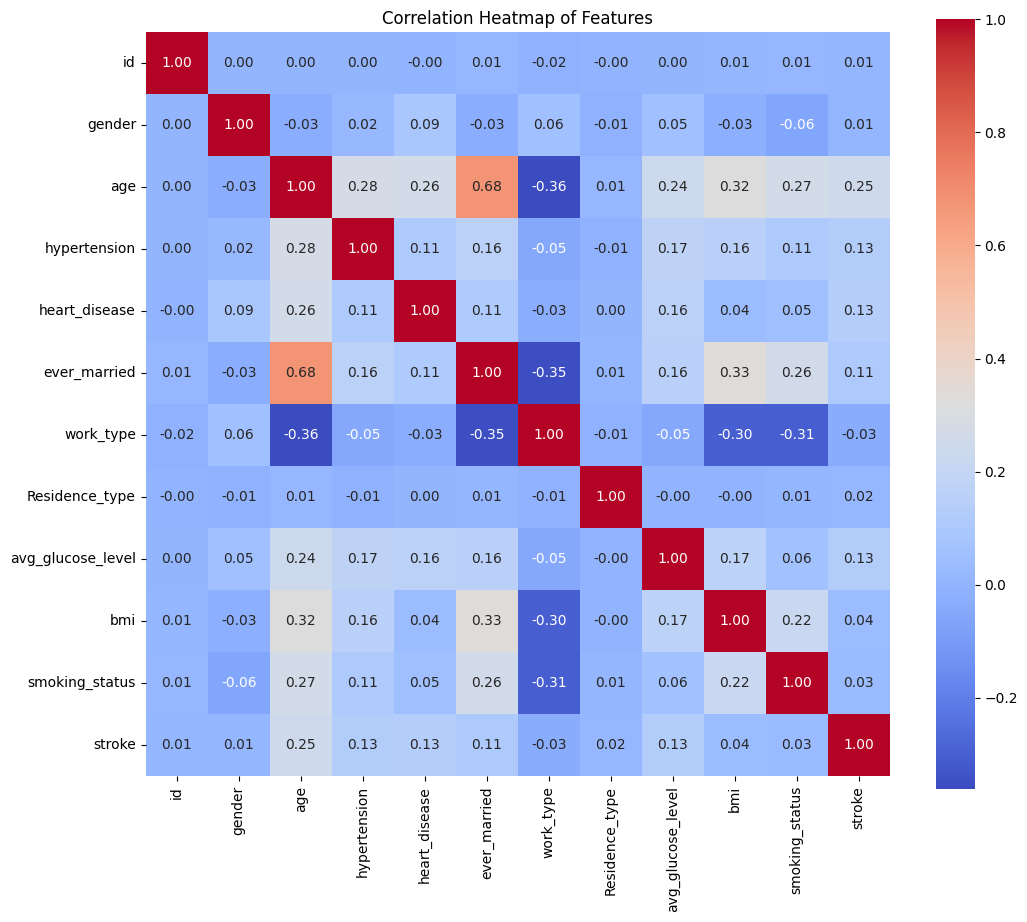

In [49]:
corr_matrix = data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Features')
plt.show()

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
print(X_scaled)

[[ 1.18979109  1.05124201 -0.32863749 ...  2.70644995  1.00489263
  -0.3518194 ]
 [-0.84048369  0.78588869 -0.32863749 ...  2.12165168 -0.09914235
   0.58143361]
 [ 1.18979109  1.6261742  -0.32863749 ... -0.00486741  0.47235811
   0.58143361]
 ...
 [-0.84048369 -0.3639757  -0.32863749 ... -0.51126562  0.22557382
   0.58143361]
 [ 1.18979109  0.34363316 -0.32863749 ...  1.32837547 -0.42385852
  -0.3518194 ]
 [-0.84048369  0.03405428 -0.32863749 ... -0.46069205 -0.34592664
  -1.28507241]]


In [52]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,
                                                    test_size=0.2,
                                                    random_state=42)


In [54]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [55]:
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)[:,1]

In [57]:
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.956275720164609

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       976
           1       0.95      0.96      0.96       968

    accuracy                           0.96      1944
   macro avg       0.96      0.96      0.96      1944
weighted avg       0.96      0.96      0.96      1944



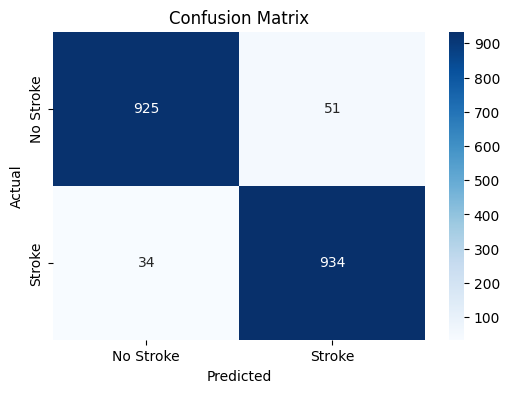

In [58]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


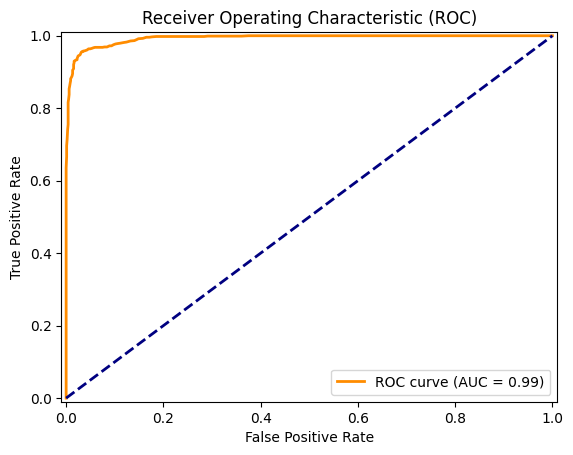

In [59]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()